### Könyvtárak importálása

In [3]:
#----------Fájkezelés----------
import numpy as np
import pandas as pd
import pandas_profiling
import os
ldir = os.chdir(r'C:\Users\Gergely\Documents\Datasets')
#from vega_datasets import data
from gapminder import gapminder

#import aethos as at

#----------Statisztika----------
from pandas_summary import DataFrameSummary
import researchpy as rp
#from scipy import stats
import scipy.stats

#----------Vizualizáció----------
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#import plotly.express as px
#import plotly.graph_objects as go
import ipywidgets
#import qgrid

#----------Sklearn----------
#from sklearn import linear_model
#from sklearn.linear_model import LinearRegression
#from sklearn.linear_model import SGDRegressor
#from sklearn.metrics import r2_score
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.datasets.samples_generator import make_regression
#from sklearn.preprocessing import StandardScaler

#from scipy.optimize import curve_fit 

### Dataframe beolvasása

In [32]:
'''df = pd.read_csv('Gapminder.csv'
                 #,nrows=5, usecols=['country', 'year', 'pop']
                 #,dtype={'country':'category', 'year':'int16'}
                 #,encoding='ISO-8859-2'
                 #,delimiter=','
                )'''

"df = pd.read_csv('Gapminder.csv'\n                 #,nrows=5, usecols=['country', 'year', 'pop']\n                 #,dtype={'country':'category', 'year':'int16'}\n                 #,encoding='ISO-8859-2'\n                 #,delimiter=','\n                )"

### Oszlopok törlése

In [ ]:
#df.drop(columns=['country', 'gdpPercap'], inplace=True)

### Oszlopok nevei

In [ ]:
#df.columns = ['Első_oszlop', 'Második_oszlop', 'Harmadik_oszlop', 'Utolsó_oszlop']

In [33]:
df

,country,year,pop
0,Afghanistan,1952,8425333
1,Afghanistan,1957,9240934
2,Afghanistan,1962,10267083
3,Afghanistan,1967,11537966
4,Afghanistan,1972,13079460


In [34]:
df = gapminder
df.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


###   
###   
### EDA

#### Shape

In [3]:
df.shape

(1704, 6)

#### Uniques & Missing values

In [38]:
dfs = DataFrameSummary(df)

dfs.columns_stats

,country,continent,year,lifeExp,pop,gdpPercap
counts,1704,1704,1704,1704,1704,1704
uniques,142,5,12,1626,1704,1704
missing,0,0,0,0,0,0
missing_perc,0%,0%,0%,0%,0%,0%
types,categorical,categorical,numeric,numeric,numeric,numeric


In [39]:
df.isnull().sum()

country      0
continent    0
year         0
lifeExp      0
pop          0
gdpPercap    0
dtype: int64

#### Adattípusok és méretük

In [40]:
df.info(memory_usage='deep', null_counts=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
country      category
continent    category
year         int16
lifeExp      float32
pop          int64
gdpPercap    float32
dtypes: category(2), float32(2), int16(1), int64(1)
memory usage: 52.3 KB


In [36]:
df.dtypes.value_counts()

int64      2
object     2
float64    2
dtype: int64

In [41]:
dfs.columns_types

numeric        4
categorical    2
Name: types, dtype: int64

#### Csak bizonyos típusú oszlopok kiválasztása

In [39]:
df.select_dtypes(include=['float64', 'int64']).head()

,year,lifeExp,pop,gdpPercap
0,1952,28.801,8425333,779.445314
1,1957,30.332,9240934,820.853030
2,1962,31.997,10267083,853.100710
3,1967,34.020,11537966,836.197138
4,1972,36.088,13079460,739.981106


#### Descriptives

In [6]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df.describe()

,year,lifeExp,pop,gdpPercap
count,1704.00,1704.00,1704.00,1704.00
mean,1979.50,59.47,29601212.32,7215.33
std,17.27,12.92,106157896.74,9857.45
min,1952.00,23.60,60011.00,241.17
25%,1965.75,48.20,2793664.00,1202.06
50%,1979.50,60.71,7023595.50,3531.85
75%,1993.25,70.85,19585221.75,9325.46
max,2007.00,82.60,1318683096.00,113523.13


#### Egy változó részletes adatai

mean                        1979.50
std                           17.27
variance                     298.09
min                            1952
max                            2007
mode                           1952
5%                          1952.00
25%                         1965.75
50%                         1979.50
75%                         1993.25
95%                         2007.00
iqr                           27.50
kurtosis                      -1.22
skewness                       0.00
sum                         3373068
mad                           15.00
cv                             0.01
zeros_num                         0
zeros_perc                       0%
deviating_of_mean                 0
deviating_of_mean_perc           0%
deviating_of_median               0
deviating_of_median_perc         0%
top_correlations                   
counts                         1704
uniques                          12
missing                           0
missing_perc                

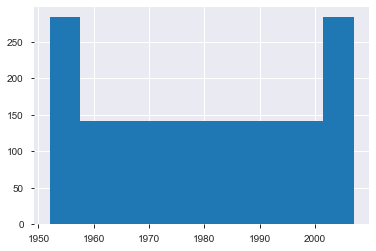

In [9]:
dfs['year']

In [46]:
rp.summary_cont(df[['lifeExp', 'pop', 'gdpPercap']])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,lifeExp,1704.00,59.47,12.92,0.31,58.86,60.09
1,pop,1704.00,29601212.32,106157896.74,2571683.45,24557220.53,34645204.12
2,gdpPercap,1704.00,7215.32,9857.45,238.80,6746.96,7683.69


In [47]:
rp.summary_cat(df['continent'])

,Variable,Outcome,Count,Percent
0,continent,Africa,624,36.62
1,,Asia,396,23.24
2,,Europe,360,21.13
3,,Americas,300,17.61
4,,Oceania,24,1.41


#### Korreláció mátrix

In [10]:
df.corr()

,year,lifeExp,pop,gdpPercap
year,1.00,0.44,0.08,0.23
lifeExp,0.44,1.00,0.06,0.58
pop,0.08,0.06,1.00,-0.03
gdpPercap,0.23,0.58,-0.03,1.00


In [49]:
print('   Pearson p: ', scipy.stats.pearsonr(df['gdpPercap'], df['lifeExp']))
print('Spearman rho: ', scipy.stats.spearmanr(df['gdpPercap'], df['lifeExp']))
print(' Kendall tau: ', scipy.stats.kendalltau(df['gdpPercap'], df['lifeExp']))

   Pearson p:  (0.5837062197812724, 3.565724696792518e-156)
Spearman rho:  SpearmanrResult(correlation=0.8264711811970715, pvalue=0.0)
 Kendall tau:  KendalltauResult(correlation=0.6369106595644447, pvalue=0.0)


#### Pandas profiling - lassú

In [11]:
#pandas_profiling.ProfileReport(df)

### Seaborn pairplot - lassú

In [12]:
#sns.pairplot(df)

###   
### Adattípusok konvertálása

In [13]:
def típus_változtatás(df, változók_tömb, új_típus):
    df[változók_tömb] = df[változók_tömb].astype(új_típus)
    
típus_változtatás(df, ['year'], 'int16')
típus_változtatás(df, ['lifeExp', 'gdpPercap'], 'float32')

típus_változtatás(df, ['country', 'continent'], 'category')

In [14]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
country      1704 non-null category
continent    1704 non-null category
year         1704 non-null int16
lifeExp      1704 non-null float32
pop          1704 non-null int64
gdpPercap    1704 non-null float32
dtypes: category(2), float32(2), int16(1), int64(1)
memory usage: 49.6 KB


###   
### Eloszlás diagram szótárból, opcionális stílussal

{'Africa': 624, 'Asia': 396, 'Europe': 360, 'Americas': 300, 'Oceania': 24}

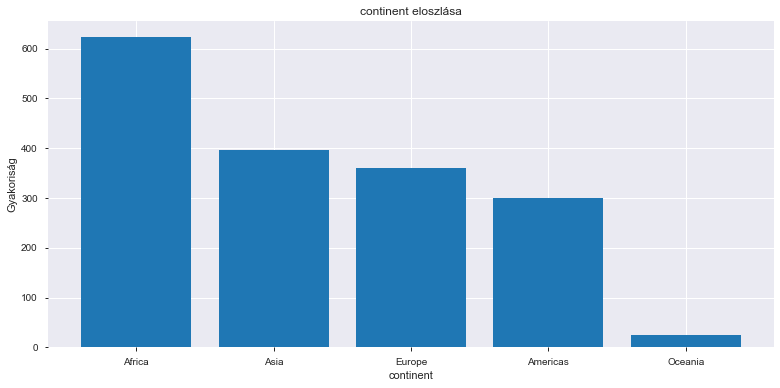

In [15]:
def eloszlás(df, változó, stílus=None):
    if (stílus!=None):
        plt.style.use(stílus) #default, bmh, fivethirtyeight, seaborn, seaborn-bright, ggplot, Solarize_Light2
    szótár = df[változó].value_counts()
    szótár = dict(szótár)
    
    fig, ax = plt.subplots(figsize=(13, 6))
    ax.bar(szótár.keys(), szótár.values())

    ax.set_xlabel(változó)
    ax.set_ylabel('Gyakoriság')
    ax.set_title(változó + ' eloszlása')
    
    plt.xlabel(változó)
    
    return szótár
    
eloszlás(df, 'continent')

### Eloszlás diagram + Ipywidget(style, x)

In [21]:
def eloszlásIpw(df):
    oszlopok = list(df.columns)
    oszlopok.insert(0, '')
    @ipywidgets.interact
    def plot(x_=oszlopok, style_=['default', 'bmh', 'fivethirtyeight', 'seaborn', 'seaborn-bright', 'ggplot', 'Solarize_Light2']):
         (plt.style.use(style_),
          plt.bar(dict(df[x_].value_counts()).keys(), dict(df[x_].value_counts()).values()),
          plt.xlabel(x_),
          plt.ylabel('gyakoriság'),
          plt.title(x_ + ' eloszlása'),
          plt.show()
         )

eloszlásIpw(df)

interactive(children=(Dropdown(description='x_', options=('', 'country', 'continent', 'year', 'lifeExp', 'pop'…

### Bar plot + Ipywidgets(x, y, desc, color)

In [17]:
def barplot(df, v_h):
    oszlopok = list(df.columns)
    oszlopok.insert(0, '')
    sns.set(rc={'figure.figsize': (12, 7)})
    if (v_h == 'v'):
        @ipywidgets.interact
        def plot(x_=oszlopok, y_=oszlopok, desc_=[True, False], color_=['royalblue', 'teal', 'darkviolet']):
            (sns.barplot(data=df, x=x_, y=y_, color=color_, orient=v_h, order={k: v for k, v in sorted(dict(df.groupby(by=x_).mean().loc[:, y_]).items(), key=lambda item: item[1], reverse=desc_)}.keys()).set_title('Average ' + str(y_) + ' by ' + str(x_)))
    elif (v_h == 'h'):
        @ipywidgets.interact
        def plot(x_=oszlopok, y_=oszlopok, desc_=[True, False],  color_=['royalblue', 'teal', 'darkviolet']):
            (sns.barplot(data=df, x=x_, y=y_, color=color_, orient=v_h, order={k: v for k, v in sorted(dict(df.groupby(by=y_).mean().loc[:, x_]).items(), key=lambda item: item[1], reverse=desc_)}.keys()).set_title('Average ' + str(x_) + ' by ' + str(y_)))

barplot(df, 'h')

interactive(children=(Dropdown(description='x_', options=('', 'country', 'continent', 'year', 'lifeExp', 'pop'…

### Boxplot

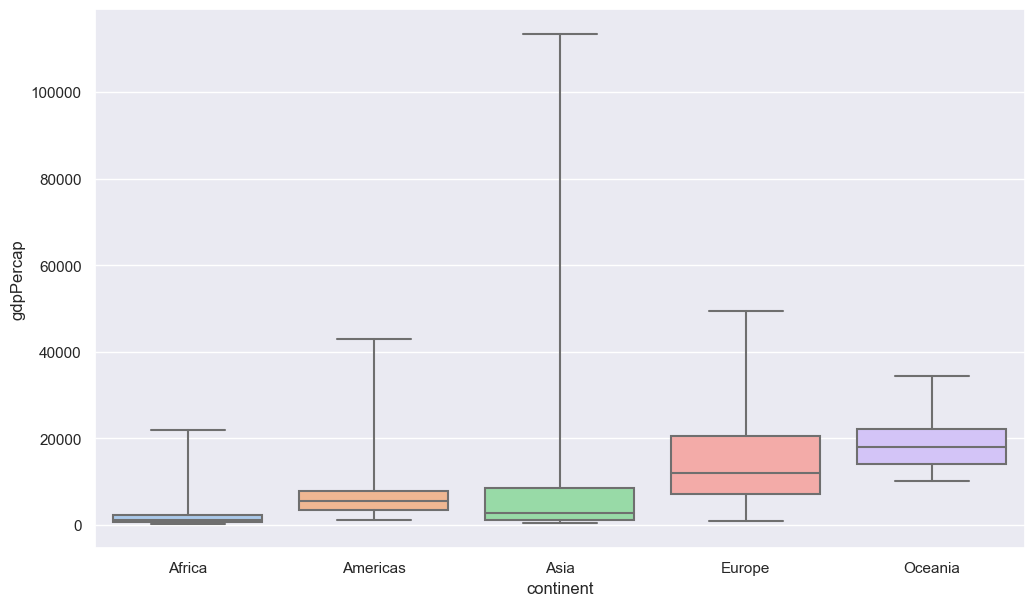

In [18]:
def boxplot(df, x, y):
    sns.boxplot(x=x, y=y, data=df, whis='range', palette='pastel')
    
boxplot(df, 'continent', 'gdpPercap')

### Boxplot + Ipywidget(x, y, palette)

In [19]:
def boxplotIpw(df, h_v):
    oszlopok = list(df.columns)
    oszlopok.insert(0, '')
    if (h_v == 'h'):
        @ipywidgets.interact
        def plot(x_=df.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']).columns, y_=oszlopok, palette_=['pastel', 'Set2', 'husl', 'vlag', 'Paired']):
            (sns.boxplot(x=x_, y=y_, data=df, whis=1.5, palette=palette_, orient=h_v))
    elif (h_v == 'v'):
        @ipywidgets.interact
        def plot(x_=oszlopok, y_=df.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']).columns, palette_=['pastel', 'Set2', 'husl', 'vlag', 'Paired']):
            (sns.boxplot(x=x_, y=y_, data=df, whis=1.5, palette=palette_, orient=h_v))

boxplotIpw(df, 'v')

interactive(children=(Dropdown(description='x_', options=('', 'country', 'continent', 'year', 'lifeExp', 'pop'…

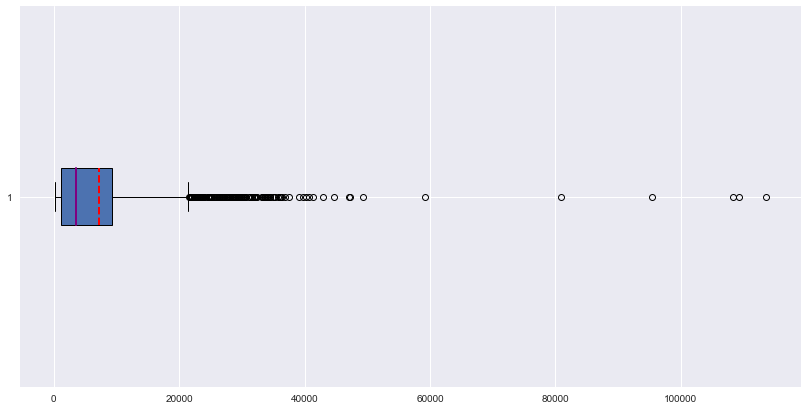

In [57]:
def boxplot_plt(df, oszlop):
    fig, ax = plt.subplots()

    ax.boxplot((df[oszlop]), vert=False, showmeans=True, meanline=True,
           patch_artist=True,                               #Boxplot kitöltése kékkel
           medianprops={'linewidth': 2, 'color': 'purple'}, #Medián vonal
           meanprops={'linewidth': 2, 'color': 'red'})      #Átlag vonal

    fig.set_figheight(7)
    fig.set_figwidth(14)
    
boxplot_plt(df, 'gdpPercap')